# Currencies Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of currencies.)
    
    NOTE: pinkfish does not yet have full support for currencies backtesting, and
    the currency data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)


currencies = {
#     'BTCUSD=X': 'Bitcoin USD Futures', 1),
#     'ETHUSD=X': 'Ethereum USD 
    'EURUSD=X': 'EUR/USD Futures',
    'JPY=X':    'USD/JPY Futures',
    'GBPUSD=X': 'GBP/USD Futures',
    'AUDUSD=X': 'AUD/USD Futures',
    'NZDUSD=X': 'NZD/USD Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'GBPJPY=X': 'GBP/JPY Futures',
    'EURGBP=X': 'EUR/GBP Futures',
    'EURCAD=X': 'EUR/CAD Futures',
    'EURSEK=X': 'EUR/SEK Futures',
    'EURCHF=X': 'EUR/CHF Futures',
    'EURHUF=X': 'EUR/HUF Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'CNY=X':    'USD/CNY Futures',
    'HKD=X':    'USD/HKD Futures',
    'SGD=X':    'USD/SGD Futures',
    'INR=X':    'USD/INR Futures',
    'MXN=X':    'USD/MXN Futures',
    'PHP=X':    'USD/PHP Futures',
    'IDR=X':    'USD/IDR Futures',
    'THB=X':    'USD/THB Futures',
    'MYR=X':    'USD/MYR Futures',
    'ZAR=X':    'USD/ZAR Futures',
    'RUB=X':    'USD/RUB Futures'
}

symbols = list(currencies)
#symbols = ['EURUSD=X']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : True,
    'use_vola_weight' : False
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-03-02,0,1.55,2808,entry,LONG,EURCAD=X
1,2007-03-02,1,9.27,469,entry,LONG,EURSEK=X
2,2007-03-02,2,7.39,588,entry,LONG,ZAR=X
3,2007-03-02,3,0.68,6418,entry,LONG,EURGBP=X
4,2007-03-02,4,0.69,6309,entry,LONG,NZDUSD=X


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2007-03-02,0.69,2007-03-05,0.67,-0.02,-97.81,6309,-97.81,LONG,NZDUSD=X
1,2007-03-02,0.78,2007-03-05,0.77,-0.01,-79.97,5544,-177.78,LONG,AUDUSD=X
2,2007-03-02,1.55,2007-03-09,1.54,-0.01,-25.55,2808,-203.33,LONG,EURCAD=X
3,2007-03-02,7.82,2007-03-09,7.81,-0.01,-5.00,555,-208.33,LONG,HKD=X
4,2007-03-02,11.13,2007-03-22,10.98,-0.15,-58.62,390,-266.94,LONG,MXN=X


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-07-26,96623.13,96623.13,96623.13,23150,70789.69,1.00,X
2023-07-27,96630.64,96630.64,96630.64,23150,70789.69,1.00,-
2023-07-28,96506.31,96506.31,96506.31,23200,66670.95,1.00,O
2023-07-31,96581.72,96581.72,96581.72,23200,66670.95,1.00,-
2023-08-01,96492.38,96492.38,96492.38,10,92597.21,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2007-03-02
end                                                     2023-08-01
beginning_balance                                           100000
ending_balance                                            96492.38
total_net_profit                                          -3507.62
gross_profit                                              79288.34
gross_loss                                               -82795.96
profit_factor                                                 0.96
return_on_initial_capital                                    -3.51
annual_return_rate                                           -0.22
trading_period                           16 years 4 months 30 days
pct_time_in_market                                           99.95
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
EURCHF=X,-$861.43,0.04,0.25,5.65
INR=X,"$1,723.10",0.04,-0.49,-11.30
EURCAD=X,-$216.13,0.04,0.06,1.42
EURSEK=X,-$316.19,0.04,0.09,2.07
ZAR=X,"$1,925.82",0.04,-0.55,-12.63
JPY=X,-$349.73,0.04,0.10,2.29
GBPJPY=X,$7.97,0.04,-0.00,-0.05
EURHUF=X,$426.88,0.04,-0.12,-2.80
MYR=X,"$1,770.37",0.04,-0.50,-11.61
EURGBP=X,$735.81,0.04,-0.21,-4.82


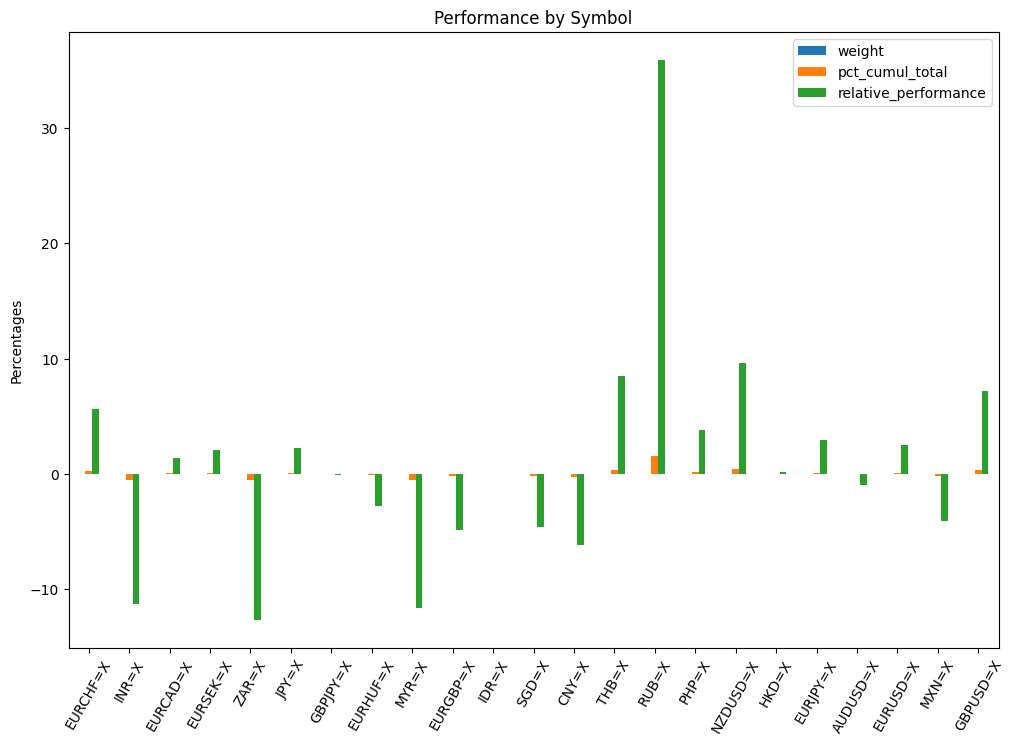

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,EURCHF=X,INR=X,EURCAD=X,EURSEK=X,ZAR=X,JPY=X,GBPJPY=X,EURHUF=X,MYR=X,EURGBP=X,...,THB=X,RUB=X,PHP=X,NZDUSD=X,HKD=X,EURJPY=X,AUDUSD=X,EURUSD=X,MXN=X,GBPUSD=X
EURCHF=X,1.00,-0.06,0.10,-0.04,-0.19,0.17,0.27,-0.17,-0.02,0.10,...,-0.07,-0.01,-0.06,0.16,-0.01,0.38,0.18,0.21,-0.10,0.16
INR=X,-0.06,1.00,0.03,0.15,0.32,-0.01,-0.21,0.20,0.10,0.02,...,0.17,0.02,0.25,-0.30,0.09,-0.23,-0.33,-0.19,0.14,-0.25
EURCAD=X,0.10,0.03,1.00,0.23,0.07,-0.23,-0.10,0.07,-0.03,0.37,...,-0.08,0.03,0.01,-0.03,-0.03,0.19,-0.08,0.42,0.12,0.15
EURSEK=X,-0.04,0.15,0.23,1.00,0.30,-0.13,-0.23,0.27,0.07,0.13,...,0.06,0.00,0.09,-0.31,0.05,-0.16,-0.34,-0.10,0.20,-0.19
ZAR=X,-0.19,0.32,0.07,0.30,1.00,-0.06,-0.37,0.44,0.17,0.01,...,0.20,0.02,0.19,-0.59,0.07,-0.40,-0.63,-0.37,0.37,-0.43
JPY=X,0.17,-0.01,-0.23,-0.13,-0.06,1.00,0.56,-0.14,0.03,-0.10,...,0.06,0.01,0.01,-0.03,0.01,0.54,0.00,0.13,-0.14,-0.07
GBPJPY=X,0.27,-0.21,-0.10,-0.23,-0.37,0.56,1.00,-0.29,-0.10,-0.42,...,-0.10,-0.00,-0.10,0.38,-0.04,0.78,0.43,0.24,-0.25,0.66
EURHUF=X,-0.17,0.20,0.07,0.27,0.44,-0.14,-0.29,1.00,0.11,-0.00,...,0.13,0.01,0.13,-0.34,0.02,-0.32,-0.37,-0.22,0.25,-0.25
MYR=X,-0.02,0.10,-0.03,0.07,0.17,0.03,-0.10,0.11,1.00,-0.03,...,0.11,-0.01,0.12,-0.21,0.04,-0.14,-0.22,-0.16,0.24,-0.16
EURGBP=X,0.10,0.02,0.37,0.13,0.01,-0.10,-0.42,-0.00,-0.03,1.00,...,-0.06,0.02,-0.00,0.00,0.00,0.17,-0.01,0.28,0.07,-0.45


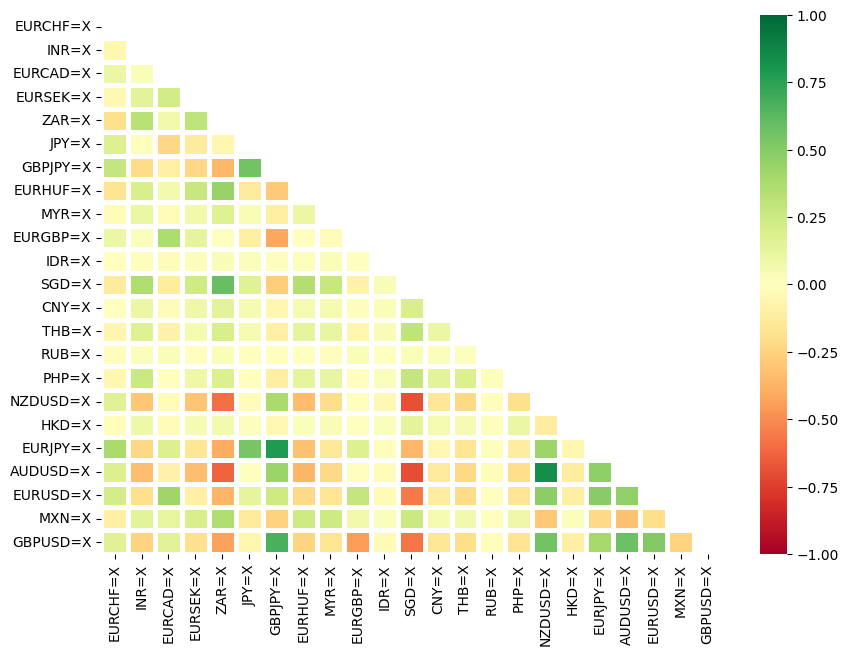

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

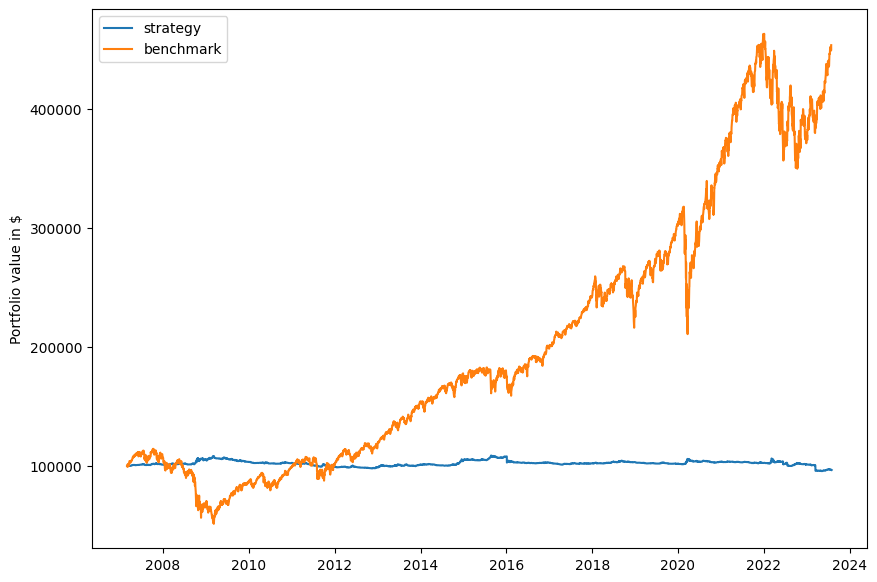

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,-0.22,9.66
max_closed_out_drawdown,-12.11,-55.17
annualized_return_over_max_drawdown,0.02,0.18
best_month,4.81,23.60
worst_month,-4.80,-30.98
sharpe_ratio,-0.06,0.56
sortino_ratio,-0.06,0.68
monthly_std,0.79,4.80
annual_std,2.61,17.49


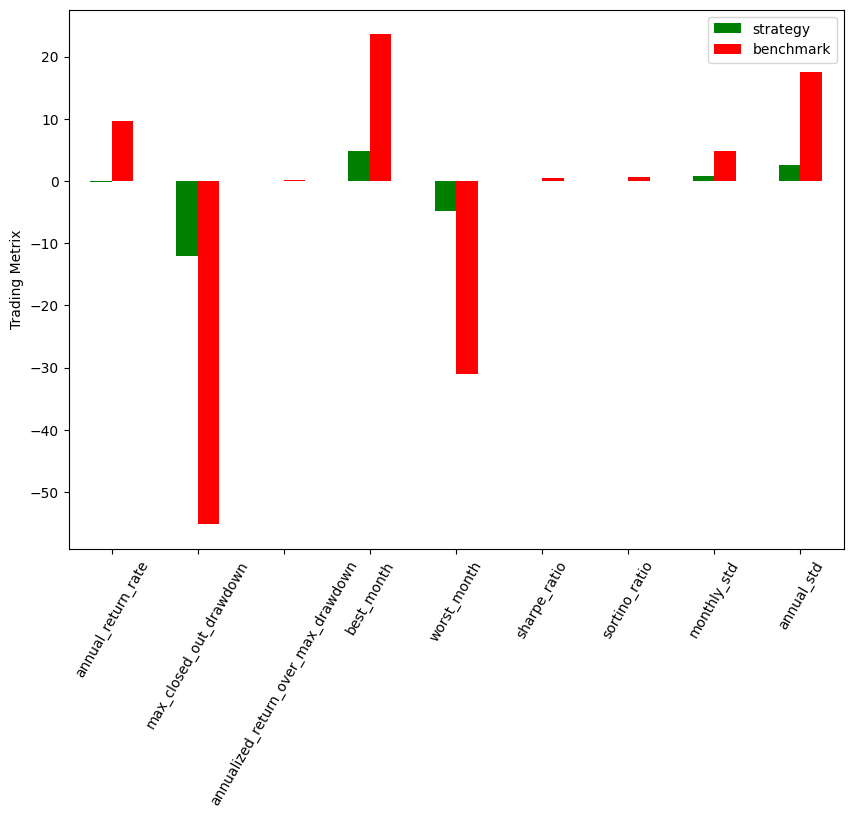

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            -0.06
sharpe_ratio_max        -0.01
sharpe_ratio_min        -0.11
strategy risk            0.03
instrument risk          0.17
optimal target risk     -0.06
half kelly criterion    -0.03
aggressive leverage     -0.34
moderate leverage       -0.17
conservative leverage   -0.31
dtype: float64